# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm 
The dataset used in this example is the "make_moons" dataset from scikit-learn, which creates two interlocking half-moons, a common problem for clustering algorithms. The code will show how DBSCAN works and will include a couple of graphs to visualize the results.

In [1]:
import numpy as np  # for linear algebra functions
import pandas as pd  # for data processing

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.datasets import make_moons  # for creating synthetic dataset
from sklearn.cluster import DBSCAN  # DBSCAN algorithm
from sklearn.metrics import silhouette_score  # for evaluating cluster quality

# Generate Data
Here, we generate a synthetic dataset using make_moons. We create 200 samples with added noise to make the clustering more challenging.



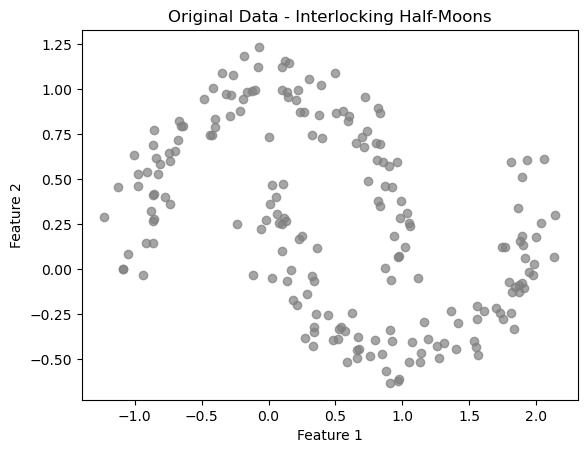

In [2]:
# Create synthetic dataset with interlocking half-moons
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7)
plt.title("Original Data - Interlocking Half-Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Apply DBSCAN
We apply DBSCAN to the dataset with an epsilon of 0.2 and a minimum of 5 samples to form a dense cluster. This means that a point must have at least 5 neighbors within a radius of 0.2 to be considered part of a cluster.

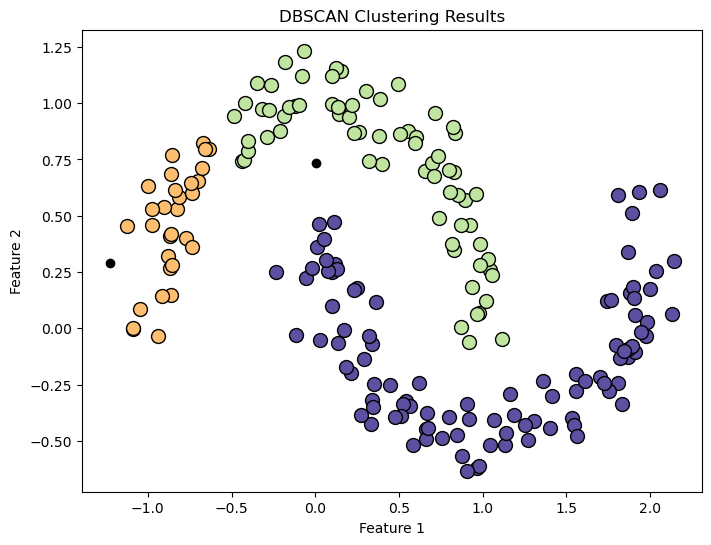

In [3]:
# Initialize DBSCAN with epsilon 0.2 and min_samples 5
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit DBSCAN to the data
cluster_labels = dbscan.fit_predict(X)

# Plot the clusters
unique_labels = np.unique(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)
    xy = X[class_member_mask]

    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10 if k != -1 else 6,
    )

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Cluster Evaluation
To evaluate the quality of the clusters, we calculate the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

In [4]:
# Calculate silhouette score to evaluate cluster quality
sil_score = silhouette_score(X, cluster_labels)

print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.25


# Interpretation of the Silhouette Score
A silhouette score of 0.25 suggests that the clustering has a moderate degree of overlap or ambiguity. This score implies that some points might not be close to their assigned cluster's centroid or could be near the boundary between clusters. In a perfect clustering scenario, you'd expect scores above 0.5, with scores approaching 1 indicating distinct and well-separated clusters.

# Analysis of Possible Causes
Several factors could contribute to a lower silhouette score with DBSCAN:

Noise and Outliers: DBSCAN is designed to identify dense regions and treat other points as noise or outliers. If there's significant noise in the data, this can reduce the silhouette score.

Cluster Structure: The interlocking half-moons dataset used here represents a challenging clustering problem because the shapes are complex and non-linear. 

Parameters Tuning: DBSCAN has parameters such as eps (the radius for defining neighborhoods) and min_samples (the minimum number of points to form a cluster). 

# Possible Solutions and Improvements
To improve the silhouette score and the quality of clustering, consider these strategies:

Parameter Tuning: Experiment with different values for eps and min_samples

Outlier Handling: Identify and handle noise or outliers in the data. Outliers can disrupt the clustering process and affect cluster cohesion.
Data Preprocessing: Preprocessing the data to remove noise or normalize features can improve the clustering quality.

Algorithm Choice: If DBSCAN does not yield satisfactory results, consider using other clustering algorithms like k-means or hierarchical clustering. Each algorithm has strengths and weaknesses depending on the data's structure.